In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/ubuntu/deep-chollet/train'

base_dir = '/home/ubuntu/deep-chollet/cats_and_dogs_small'
#os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
# Safety block

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
len(os.listdir(train_cats_dir))

1000

In [5]:
len(os.listdir(train_dogs_dir))

1000

In [6]:
len(os.listdir(validation_cats_dir))

500

In [7]:
len(os.listdir(validation_dogs_dir))

500

In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [4]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [5]:
from keras import backend as K
K.clear_session()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
from keras import layers
from keras import models
from keras import initializers

In [7]:
#import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
#with tf.Session() as sess:
 #    sess.run(tf.global_variables_initializer())
#tf.global_variables_initializer()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [34]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 176ms/step - loss: 0.6876 - acc: 0.5560 - val_loss: 0.6611 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 16s 155ms/step - loss: 0.6556 - acc: 0.6125 - val_loss: 0.6355 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6116 - acc: 0.6730 - val_loss: 0.6039 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 15s 155ms/step - loss: 0.5656 - acc: 0.7175 - val_loss: 0.5856 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5395 - acc: 0.7255 - val_loss: 0.5775 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 16s 155ms/step - loss: 0.5069 - acc: 0.7435 - val_loss: 0.5669 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 15s 155ms/step - loss: 0.4831 - acc: 0.7545 - val_loss: 0.5712 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

In [15]:
model.save('cats_and_dogs_small_1.h5')

<Figure size 432x288 with 0 Axes>

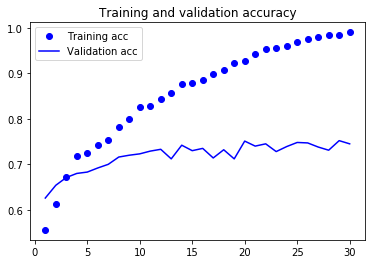

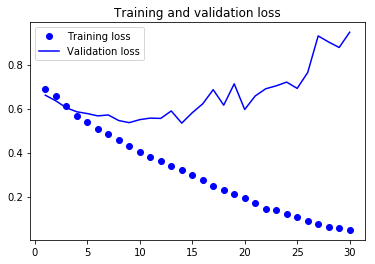

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [36]:
from keras.preprocessing import image

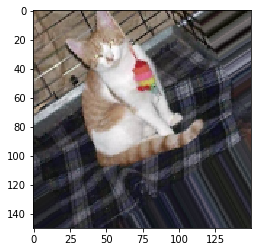

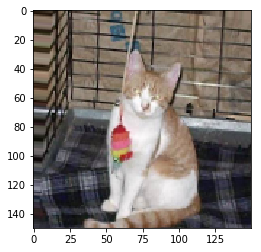

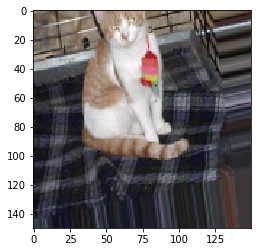

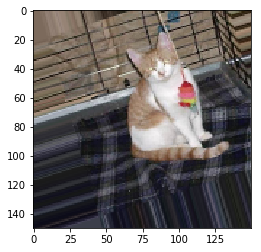

In [37]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
          
img_path = fnames[3]
          
img = image.load_img(img_path, target_size=(150, 150))
          
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 41s 412ms/step - loss: 0.6935 - acc: 0.5169 - val_loss: 0.6821 - val_acc: 0.5451
Epoch 2/100
100/100 [==============================] - 38s 381ms/step - loss: 0.6838 - acc: 0.5444 - val_loss: 0.6642 - val_acc: 0.5806
Epoch 3/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6702 - acc: 0.5850 - val_loss: 0.6535 - val_acc: 0.6079
Epoch 4/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6570 - acc: 0.5987 - val_loss: 0.6564 - val_acc: 0.5920
Epoch 5/100
100/100 [==============================] - 37s 371ms/step - loss: 0.6523 - acc: 0.6100 - val_loss: 0.6148 - val_acc: 0.6618
Epoch 6/100
100/100 [==============================] - 40s 399ms/step - loss: 0.6349 - acc: 0.6381 - val_loss: 0.7626 - val_acc: 0.5266
Epoch 7/100
100/100 [==============================] - 37s 374ms/step - loss: 0.6146 - acc: 0.6544 -

100/100 [==============================] - 38s 377ms/step - loss: 0.4085 - acc: 0.8122 - val_loss: 0.4656 - val_acc: 0.7938
Epoch 61/100
100/100 [==============================] - 37s 371ms/step - loss: 0.4026 - acc: 0.8134 - val_loss: 0.4301 - val_acc: 0.8115
Epoch 62/100
100/100 [==============================] - 39s 389ms/step - loss: 0.4083 - acc: 0.8091 - val_loss: 0.4416 - val_acc: 0.7944
Epoch 63/100
100/100 [==============================] - 37s 375ms/step - loss: 0.4073 - acc: 0.8172 - val_loss: 0.4458 - val_acc: 0.8122
Epoch 64/100
100/100 [==============================] - 37s 375ms/step - loss: 0.4128 - acc: 0.8091 - val_loss: 0.4275 - val_acc: 0.7995
Epoch 65/100
100/100 [==============================] - 37s 374ms/step - loss: 0.3993 - acc: 0.8178 - val_loss: 0.4284 - val_acc: 0.8179
Epoch 66/100
100/100 [==============================] - 37s 374ms/step - loss: 0.4013 - acc: 0.8188 - val_loss: 0.5060 - val_acc: 0.7779
Epoch 67/100
100/100 [==============================] 

In [40]:
model.save('cats_and_dogs_small_2.h5')

<Figure size 432x288 with 0 Axes>

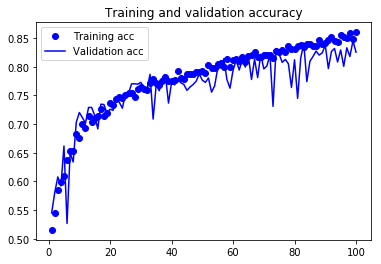

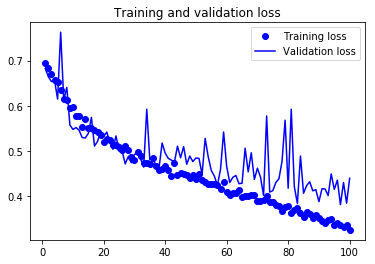

<Figure size 432x288 with 0 Axes>

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [43]:
print(history.history['val_acc'][-1])

0.825507614213198
